<a href="https://colab.research.google.com/github/sgr1118/FD/blob/main/FD25_Linear_Regression_and_Logistic_Regression(220822)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 25-1. 회귀(Regression)에 대하여

- 회귀분석이란 통계학에서 전통적으로 많이 사용되던 분석 방법으로, 관찰된 여러 데이터를 기반으로 각 연속형 변수 간의 관계를 모델링하고 이에 대한 적합도를 측정하는 분석 방법이다.

- 회귀 분석은 모두 독립변수와 종속변수 사이의 상로 관련성을 규명하는 것이다.






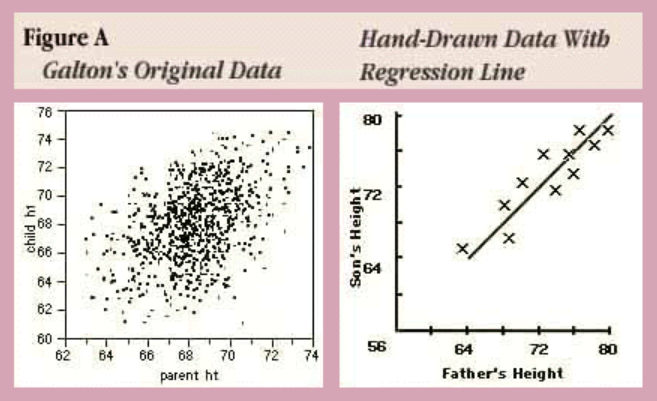

# 회귀란?

- 독립변수와 종속변수의 함수 관계도를 보면 직선 형태의 기울기가 1보다 작은것을 볼 수 있다. 즉 독립변수의 크기와 상관없이 종속변수는 전체 평균에 수렴하려는 성질을 회귀라고 말한다.

- 하지만 오늘날 회귀분석이란 단순히 평균으로 수렴하는 현상을 넘어서서, 두 개 이상의 변수 사이의 함수관계를 추구하는 통계적 방법을 의미

# 회귀분석의 4가지 가정  
[회귀분석의 4가지 가정 참고 링크](https://kkokkilkon.tistory.com/175)

- 선형성

- 독립성

- 등분산성

- 정규성

# 지도학습의 두 종류 : 분류와 회귀

- 분류 : 데이터 xx의 여러 feature 값들을 이용하여 해당 데이터의 클래스 yy를 추론하는 것

- 회귀 : 데이터 xx의 여러 feature 값들을 이용하여 연관된 다른 데이터 yy의 정확한 값을 추론하는 것

# 25-2. 선형 회귀 분석(Linear Regression)

- 종속변수 Y와 한 개 이상의 독립변수 X와의 선형 상관관계를 모델링하는 회귀분석 기법

### 1. 선형 회귀 모델링
y=βx+ϵ

- β : 회귀 계수이며 모델의 기울기
- ϵ : 종속 변수와 독립 변수사이에 오차
- 위에 둘은 연구자가 추정해야 할 파라미터 값

### 2. 머신러닝에서의 선형회귀모델 표기법
H=Wx+b

- W : 가중치 (고차원의 행렬 형태인 경우가 많음)
- b : 편향

### 3. 용어 설명
- 잔차 : 회귀모델을 이용해 추정한 값과 실제 데이터의 차이

- 최소제곱법 : n 개의 점 데이터에 대하여 잔차의 제곱의 합을 최소로 하는 W, b를 구하는 방법



In [ ]:
# 4. 데이터셋 준비하기 (보스턴 집 값 데이터 사용)

from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np

# 데이터 로드
boston = load_boston()
data, price = boston['data'], boston['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

df = pd.DataFrame(x_train, columns = boston['feature_names'])
print("boston dataset의 차원: ", data.shape)
print("price의 차원", price.shape)
print("boston train dataset의 차원: ", x_train.shape)
print("boston test dataset의 차원: ", x_test.shape)

print('Boston dataset의 예시')
df.head()

boston dataset의 차원:  (506, 13)
price의 차원 (506,)
boston train dataset의 차원:  (404, 13)
boston test dataset의 차원:  (102, 13)
Boston dataset의 예시


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14
1,37.66190,0.0,18.10,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52
2,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70
3,0.05660,0.0,3.41,0.0,0.489,7.007,86.3,3.4217,2.0,270.0,17.8,396.90,5.50
4,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46


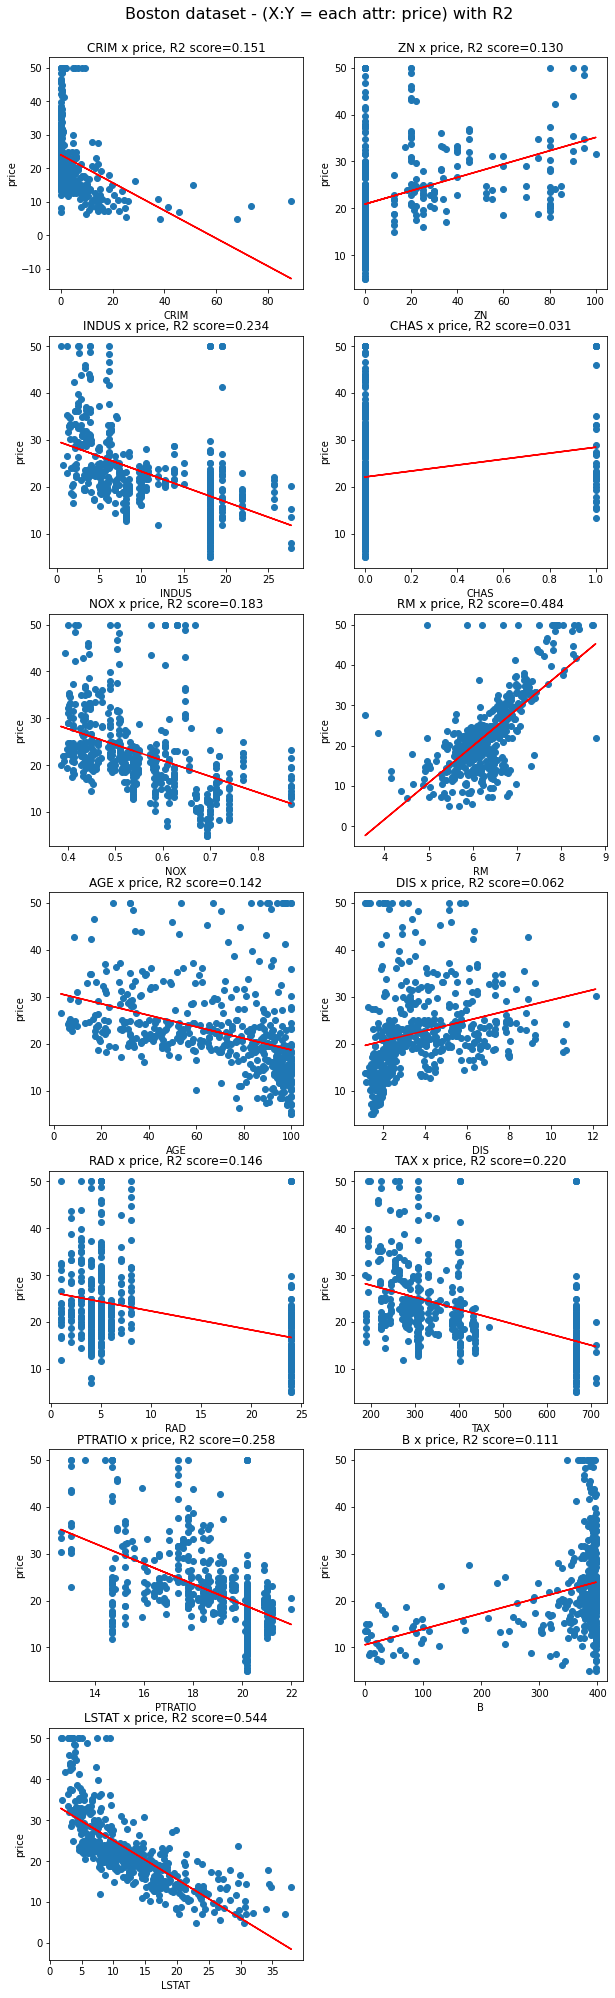

In [ ]:
# 5. Boston Dataset에 Linear Regression 적용해보기

# Boston dataset의 각 attribute에 선형회귀 적용하는 예제
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]):  # boston dataset에서 i번째 attribute(column)을 살펴볼 거에요.
  single_attr, attr_name = data[:, i].reshape(-1, 1), boston['feature_names'][i] 
  # i번째 attribute에 대한 data 및 이름
  estimator = LinearRegression() # 선형 회귀 모델이에요.

  # x에는 single_attr, y에는 price에 해당하는 데이터를 대입해서 최소제곱법을 이용하여 모델 내에서 W, b를 구하는 과정
  estimator.fit(single_attr, price)

  # 위 fit() 과정을 통해 회귀계수를 기반으로 회귀모델에 x값을 대입했을 때 예측 y값
  pred_price = estimator.predict(single_attr)

  score = metrics.r2_score(price, pred_price)

  # 캔버스 생성
  ax = fig.add_subplot(7, 2, i+1)
  ax.scatter(single_attr, price) # 실제 데이터에 대한 산포도
  ax.plot(single_attr, pred_price, color='red') # 선형회귀모델의 추세선
  ax.set_title("{} x price, R2 score={:.3f}".format(attr_name ,score)) #subplot의 제목이에요
  ax.set_xlabel(attr_name) # x축
  ax.set_ylabel('price') # y축

  #  R2 score가 높은 편에 속하는 LSTAT(R2=0.544)와 RM(R2=0.484)을 이용하여 그린 선형회귀 모델이 그나마 데이터를 잘 설명한다고 볼 수 있다.

6. 경사 하강법(Gradient Descent Algorithm)

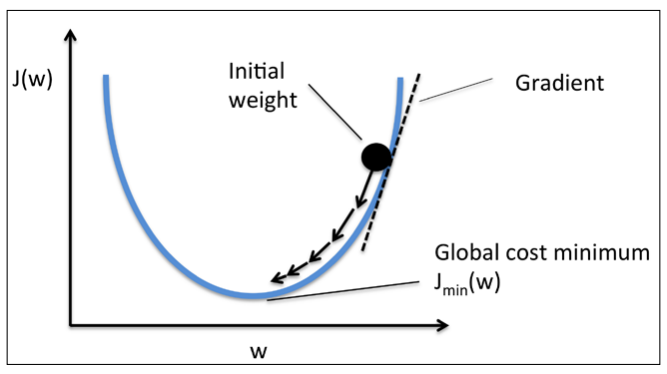

- J(W)를 최소로 하는 가중치 값을 찾으려면 기울기 값이 0인 중앙에 놓는 것이 가장 좋다. 손실 함수를 최소로 만들어주는 가중치를 바로 찾을 수 있다면 좋겠지만 파라미터의 개수가 많아질수록 많은 시간이 걸린다.

- W : = W − α * (∂/W∂) * J(W)
- 기울기 값은 다음과 같은 식으로 업데이트를 한다.
- α : 학습률 ( learning rate), 이 값이 클수록 그림의 화살표 길이가 길어져서 좀 더 빠른 수렴이 가능하다. 다만 값이 너무 커도 최적 W값을 건너뛸 수 있으니 주의해야한다.

# 25-3. 로지스틱 회귀분석(Logistic Regression)

-  데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해 주는 지도 학습 알고리즘

- 이진 분류문제를 풀 때 많이 사용

- 모델이 리턴하는 값이 연속적인 변수라는 점에서 로지스틱 회귀는 회귀 모델의 정의에 부합

- 우리가 이전 스텝에서 보았던 선형 회귀모델이 종속변수 yy의 추정치 자체를 리턴하는 것에 비해, 로지스틱 회귀모델은 모델이 리턴하는 값이 바로 데이터 xx가 어떤 범주에 속할 확률이라는 점

1. 정의 및 용어 설명
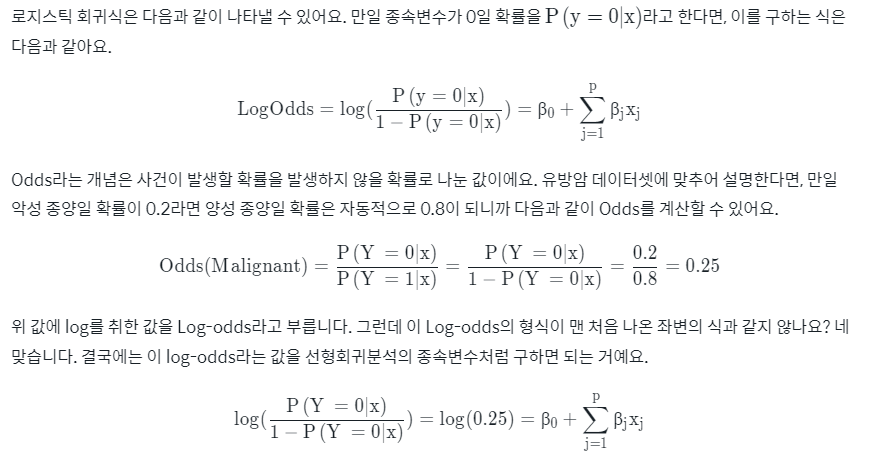

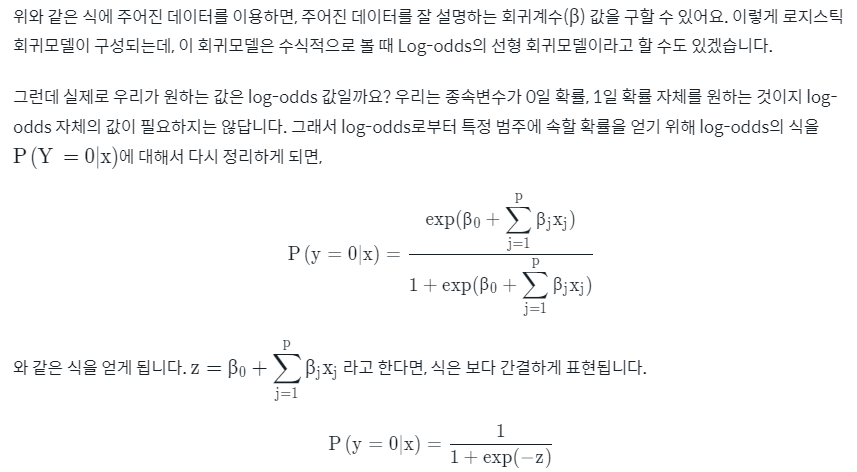

In [ ]:
# 2. 로지스틱 회귀분석 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y = 0(Malignant - 악성 종양), y=1(Benign - 양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Attribute 수: {}".format(len(cancer_X[0])))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Attribute 수: 30
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression() #로지스틱 회귀분석
LR.fit(train_X, train_y) # 유방암 train data를 이용하여 로지스틱 회귀분석 모델 학습
pred = LR.predict(test_X) # 학습된 로지스틱 회귀분석 모델을 이용한 예측값 출력


# 로지스틱 회귀분석 모델의 예측값과 실제값 비교결과를 나타낸 통계표
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# 25-4. Softmax 함수와 Cross Entropy

1. Softmax 함수

-  2가지가 아닌 여러 범주로 분류하는 함수
- Multi class classification에 적합한 함수
- 각 범주의 확률 값이 [0,1]사이의 값이고, 또 하나의 큰 특징은 모든 범주에 해당하는 softmax의 값을 전부 더했을때 그 합이 1이 된다.

-  softmax 함수는 큰 log-odds와 작은 log-odds의 차이를 극대화시켜줍니다.

- 그렇기 때문에 마지막에 softmax 함수에 모든 범주의 log-odds를 통과시키면 해당 데이터가 어떤 범주로 분류되는지 확실히 알 수 있게 되는데, 가장 큰 값을 1, 그 외 나머지 값들을 0으로 인코딩하는 one-hot encoding을 통해 표현하게 됩니다.

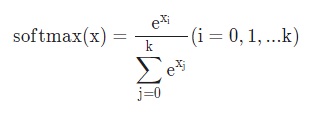

2. Cross Entropy
- softmax 함수의 손실함수로 쓰인다.
- p(x)는 실제 데이터의 범주 값, q(x)는 softmax의 결과값을 대입
- 가중치가 최적화 될수록 이 값도 줄어든다.

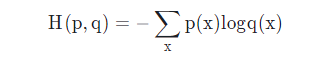

2. Cross Entropy 보충

[왜 크로스 엔트로피를 쓸까?](https://theeluwin.postype.com/post/6080524)

- 


[Cross-entropy 의 이해: 정보이론과의 관계](https://3months.tistory.com/436)

- 

In [ ]:
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()
model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax', input_shape=(30,)))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 62        
                                                                 
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 0s 5ms/step - loss: 101.6119 - accuracy: 0.3730
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 76.2265 - accuracy: 0.3730
Epoch 3/20
16/16 [==============================] - 0s 2ms/step - loss: 50.4817 - accuracy: 0.3730
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 25.1936 - accuracy: 0.3750
Epoch 5/20
16/16 [==============================] - 0s 2ms/step - loss: 4.2220 - accuracy: 0.6328
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 1.7813 - accuracy: 

In [ ]:
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()

#레이어 3장을 추가
model.add(keras.layers.Dense(n_dense, input_shape=(30,), use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))

model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 2)                 62        
                                                                 
Total params: 2,852
Trainable params: 2,852
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 0s 3ms/step - loss: 43.4816 - accuracy: 0.4707
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 3.4177 - accu

# 25-5. 정리 및 요약

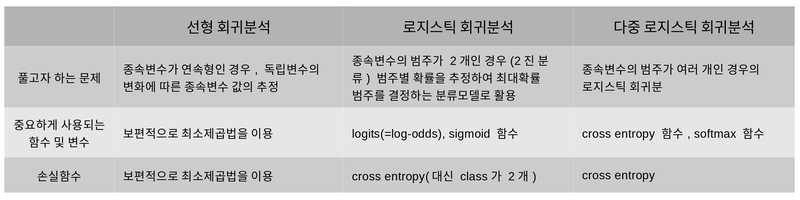